In [67]:
import pandas as pd
import numpy as np

In [68]:
df = pd.read_csv('Housing.csv')

In [69]:
print(df.shape)
df.head()
df.info()

(545, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


EDA(Exploratory Data Analysis)

<Axes: xlabel='price', ylabel='Count'>

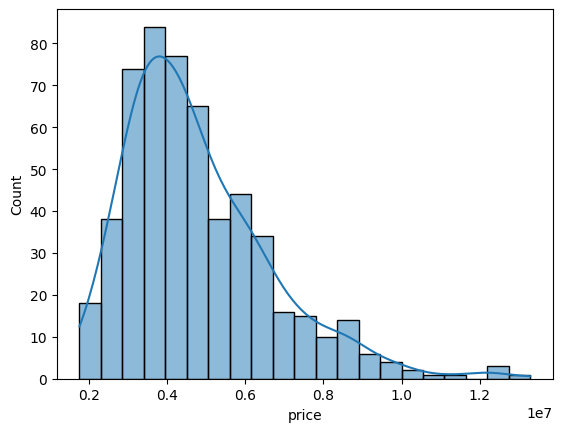

In [70]:
import seaborn as sns
sns.histplot(df['price'], kde=True)

Preprocessing Dataset 
1. Dividing numerical values and categorical values
2.Using OnehotEncoding to convert it into numerical values

In [71]:
X = df.drop('price',axis=1)
y = df['price']

numeric_cols = X.select_dtypes(include=[np.number]).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [77]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_cols),
    ("cat", categorical_transformer, categorical_cols)
])



Data Splitting and Scaling

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state=42)
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
543,2910,3,1,1,no,no,no,no,no,0,no,furnished
9,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished
533,2400,3,1,2,yes,no,no,no,no,0,no,unfurnished
274,6450,4,1,2,yes,no,no,no,no,0,no,semi-furnished
465,3800,2,1,1,yes,no,no,no,no,0,no,unfurnished


Training model

In [85]:
from sklearn.linear_model import LinearRegression
model = Pipeline(steps=[("preprocessor", preprocessor)
                        ,("regressor", LinearRegression())])
model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Model Evaluation

In [86]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')    

Mean Squared Error: 1451838962597.8086
Mean Absolute Error: 875812.7029599169
R2 Score: 0.6875282421536361
